In [1]:
import librosa 
import librosa.display as dsp

import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import os 
from glob import glob

import matplotlib.pyplot as plt
import IPython.display as ipd
import seaborn as sns

import mir_eval
import tensorflow as tf

%matplotlib inline

In [2]:
file = glob("D:/project/audio_ml/fold5/*.wav")
file

['D:/project/audio_ml/fold5\\100032-3-0-0.wav',
 'D:/project/audio_ml/fold5\\100263-2-0-117.wav',
 'D:/project/audio_ml/fold5\\100263-2-0-121.wav',
 'D:/project/audio_ml/fold5\\100263-2-0-126.wav',
 'D:/project/audio_ml/fold5\\100263-2-0-137.wav',
 'D:/project/audio_ml/fold5\\100263-2-0-143.wav',
 'D:/project/audio_ml/fold5\\100263-2-0-161.wav',
 'D:/project/audio_ml/fold5\\100263-2-0-3.wav',
 'D:/project/audio_ml/fold5\\100263-2-0-36.wav',
 'D:/project/audio_ml/fold5\\100852-0-0-0.wav',
 'D:/project/audio_ml/fold5\\100852-0-0-1.wav',
 'D:/project/audio_ml/fold5\\100852-0-0-10.wav',
 'D:/project/audio_ml/fold5\\100852-0-0-11.wav',
 'D:/project/audio_ml/fold5\\100852-0-0-12.wav',
 'D:/project/audio_ml/fold5\\100852-0-0-13.wav',
 'D:/project/audio_ml/fold5\\100852-0-0-14.wav',
 'D:/project/audio_ml/fold5\\100852-0-0-15.wav',
 'D:/project/audio_ml/fold5\\100852-0-0-16.wav',
 'D:/project/audio_ml/fold5\\100852-0-0-17.wav',
 'D:/project/audio_ml/fold5\\100852-0-0-18.wav',
 'D:/project/audio

In [3]:
audio_path='D:/project/audio_ml/fold5/6508-9-0-1.wav'
y, sr = librosa.load(audio_path, sr=44100, mono=False)

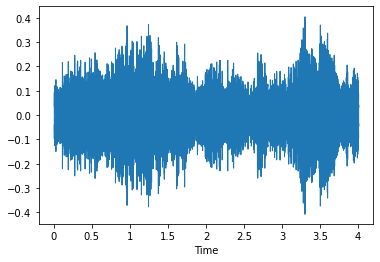

In [4]:
audio_data, sampling_rate = librosa.load('D:/project/audio_ml/fold5/6508-9-0-1.wav')
dsp.waveshow(audio_data,sr=sampling_rate)
ipd.Audio(data=audio_data,rate=sampling_rate)

In [5]:
audio_data

array([ 0.06053305,  0.09509452,  0.08330195, ..., -0.03439766,
       -0.03421376, -0.04118417], dtype=float32)

In [6]:
sampling_rate


22050

In [7]:
audio_dataset_path = 'D:/project/audio_ml/UrbanSound8K.csv'
metadata = pd.read_csv(audio_dataset_path)
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [8]:
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [9]:
pt = metadata['class'].value_counts()
pt

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [10]:
classes = metadata['class'].unique()

C:\Users\Karthik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='class'>

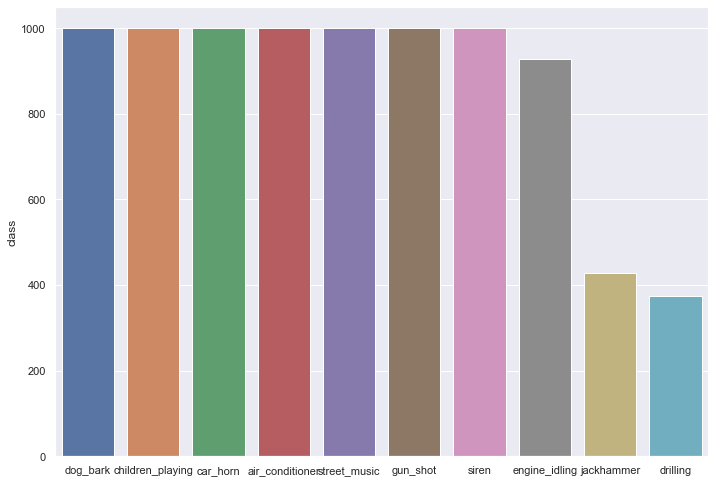

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(classes,pt,x = 'count',y = 'classes')

To extract the features, we will be using the Mel-Frequency Cepstral Coefficients (MFCC) algorithm.

MFCC algorithm summarizes the frequency distribution across the window size. This enables the analysis of both the frequency and time characteristics of the provided sound. It will allow us to identify features for classification.

In [12]:
mfccs = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)

In [13]:
mfccs

array([[-236.65656   , -223.61038   , -230.81071   , ..., -232.38405   ,
        -229.62947   , -224.83652   ],
       [ 151.01868   ,  165.22098   ,  176.60329   , ...,  196.7013    ,
         190.74863   ,  163.25464   ],
       [   3.2965689 ,  -11.636826  ,  -28.130508  , ...,  -24.908474  ,
         -23.977875  ,   -4.3925824 ],
       ...,
       [  -0.37655628,   -2.1949482 ,   -6.212624  , ...,   -4.084482  ,
          -2.8265028 ,   -5.821933  ],
       [  -1.6985912 ,    2.851233  ,    7.741797  , ...,   -9.845128  ,
         -10.0906725 ,   -5.292117  ],
       [   2.4365478 ,    1.5525494 ,   -0.42595428, ...,   -2.7711349 ,
          -5.311211  ,   -2.664092  ]], dtype=float32)

now we need to extract all the features from the dataet we are using that is Urbansounds8k. 
to do so we will use a function 
'features_extractor(file)'

In [14]:
def features_extractor(file):
    # here we load the audio data using librosa, whenever we use librosa.load
    # it returns 2 values, 
    # 1st  is the audio in array format
    # 2nd is sample_rate is  the number of 
    #samples of a sound that are taken per second to represent the event digitally
    
    audio,sample_rate = librosa.load(file_name,res_type='kaiser_fast')
    # MFCC -  mel frequency cepstral coefficients
    mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc = 40)
    
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [15]:
extracted_features = []
audio_dataset_path = "D:/project/audio_ml"
for index,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),
                             'fold' + str(row["fold"]) + '/',
                            str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    

0it [00:00, ?it/s]

C:\Users\Karthik\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
C:\Users\Karthik\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\Karthik\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


Let’s convert the entire list into a data frame using the Pandas library. This converts the results into tables for more straightforward analysis.

In [16]:
extracted_features_df = pd.DataFrame(extracted_features,columns = ['feature','class'])
extracted_features_df.head(20)

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing
5,"[-446.8255, 117.01193, -33.7923, 55.406204, 2....",children_playing
6,"[-476.60767, 119.41842, -28.514036, 55.966988,...",children_playing
7,"[-464.08258, 116.31008, -28.82692, 49.44204, -...",children_playing
8,"[-471.3208, 125.25887, -36.935383, 57.428547, ...",children_playing
9,"[-196.822, 113.993126, -13.813408, 0.4022098, ...",car_horn


In [27]:
extracted_features_df.isnull().sum()

feature    0
class      0
dtype: int64

In [18]:
x = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
x

array([[-2.1735526e+02,  7.0223381e+01, -1.3038527e+02, ...,
        -1.6930529e+00, -6.1698371e-01,  3.8600537e-01],
       [-4.2409818e+02,  1.0934077e+02, -5.2919525e+01, ...,
         5.3489321e-01, -5.4468733e-01,  4.4632107e-01],
       [-4.5879114e+02,  1.2138419e+02, -4.6520657e+01, ...,
         2.0768483e+00,  1.6962965e+00, -9.6140957e-01],
       ...,
       [-3.0388824e+02,  1.1135945e+02, -4.5941563e+01, ...,
        -3.0292377e+00,  2.7170296e+00,  7.6197419e+00],
       [-3.4411008e+02,  1.2545021e+02, -5.4903442e+01, ...,
        -7.9082441e+00, -1.6414586e+00,  5.6668444e+00],
       [-3.1560281e+02,  9.4854805e+01, -3.7222340e+01, ...,
         6.1386466e-01, -1.1449189e+01, -6.0105853e+00]], dtype=float32)

In [29]:
y.shape

(8732, 10)

In [30]:
x.shape

(8732, 40)

#MODEL PREPROCESSING

In [19]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))
y
#we are converting the labels or classes into numbers ranging from 0 - to that many classes 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
y.shape

(8732, 10)

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,
                                                 random_state = 0)
                                                 

MODEL CREATION 

In [93]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam 
from sklearn import metrics 
num_labels=y.shape[1]


Our layers will be stacked in sequence. The last layer will have a softmax activation layer because it is a multi-class classification problem.

In [94]:
model = Sequential()
# creation of first hidden layer

model.add(Dense(100,input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# creaton of the second layer

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# creation of the third layer

model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# creation of the final layer 

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [95]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [96]:
X_train.shape 

(6985, 40)

In [97]:
X_test.shape

(1747, 40)

In [98]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [99]:
y_train.shape

(6985, 10)

In [100]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='D:/project/audio_ml/model/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, 
          epochs=num_epochs, validation_data=(X_test, y_test),
          callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
214/219 [============================>.] - ETA: 0s - loss: 10.1008 - accuracy: 0.1463
Epoch 1: val_loss improved from inf to 2.07726, saving model to D:/project/audio_ml/model\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 9.9723 - accuracy: 0.1472 - val_loss: 2.0773 - val_accuracy: 0.3165
Epoch 2/200
216/219 [============================>.] - ETA: 0s - loss: 2.7239 - accuracy: 0.1981
Epoch 2: val_loss did not improve from 2.07726
219/219 [==============================] - 1s 3ms/step - loss: 2.7182 - accuracy: 0.1981 - val_loss: 2.0813 - val_accuracy: 0.2450
Epoch 3/200
217/219 [============================>.] - ETA: 0s - loss: 2.2459 - accuracy: 0.2290
Epoch 3: val_loss improved from 2.07726 to 2.00794, saving model to D:/project/audio_ml/model\audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.2444 - accuracy: 0.2296 - val_loss: 2.0079 - val_accuracy: 0.3120
Epoch 4/200
212/219 [===========

In [101]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1] * 100 ,'%')

79.45048809051514 %


TESTING OF THE COMPILED MODEL

printing the mfccs_features 

 [[-3.97309662e+02 -3.05559235e+02 -2.69680481e+02 -2.76822937e+02
  -2.98642426e+02 -3.28012848e+02 -3.77793121e+02 -4.18513245e+02
  -4.35563171e+02 -4.57345398e+02 -4.84030090e+02 -4.93013092e+02
  -4.64391205e+02 -4.43575714e+02 -4.64316193e+02 -5.03386292e+02]
 [ 1.95856155e+02  2.04408188e+02  2.00458496e+02  2.01475220e+02
   2.01820618e+02  1.96925049e+02  1.88366852e+02  1.69220642e+02
   1.47225342e+02  1.24497253e+02  1.11670891e+02  1.10510345e+02
   7.05899353e+01  4.08522644e+01  4.93941727e+01  9.02796326e+01]
 [ 3.61449318e+01  2.07098255e+01  1.37734413e+00 -7.56113911e+00
   2.22154546e+00  1.85000019e+01  3.21605148e+01  4.14749603e+01
   4.00639877e+01  3.83139267e+01  4.23209610e+01  3.54081459e+01
   5.89496460e+01  7.50385513e+01  7.08609314e+01  4.80428123e+01]
 [-1.39715376e+01 -1.51119080e+01 -1.71869106e+01 -2.58721027e+01
  -2.70387611e+01 -2.42795048e+01 -1.69478703e+01 -8.58740807e-02
   5.12717867e+00  2.89100361e+00  1.41067

'dog_bark'

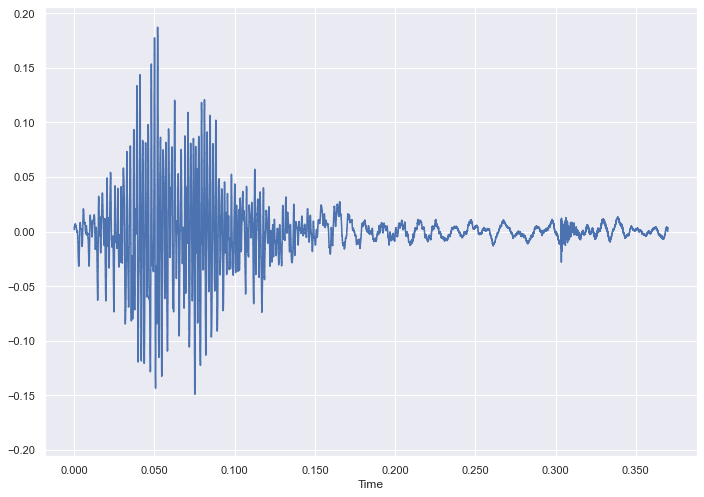

In [102]:
test_audio_path = "D:/project/audio_ml/fold8/4918-3-0-0.wav"
test_audio,sr_test = librosa.load(test_audio_path)

mfccs_features = librosa.feature.mfcc(y = test_audio, sr = sr_test,
                                      n_mfcc = 40)

print("printing the mfccs_features \n\n",mfccs_features,"\n\n")
mfccs_scaled_features = np.mean(mfccs_features.T,axis = 0 )

print("we now reduce the huge data by using the mean function of numpy module \n \n")

dsp.waveshow(test_audio,sr=sr_test)
ipd.Audio(data=test_audio,rate=sr_test)

print(mfccs_scaled_features)
print("the shape before rescalling the array \t",mfccs_scaled_features.shape,'\n\n')
print("before rescaling the array is a scalar in nature but we need the array to be in 2d"
      "here there are 40 rows of data before converting the shape \n")
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print("after reshaping the array now we have a array of the size [1,40] this indicates that 40 columns are present in 1 row \n \n")
print(mfccs_scaled_features)
print("the shape after rescalling the array \t",mfccs_scaled_features.shape,'\n\n')



predicted_label = model.predict(mfccs_scaled_features)
print(predicted_label)
classes_x = np.argmax(predicted_label,axis = 1)
predicted_class = labelencoder.inverse_transform(classes_x)
predicted_class[0]

# now lets write code to find the original answer in the dataset
 